<a href="https://colab.research.google.com/github/majorquev/DBDC_202010_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/Clase5/00_Ejemplos_adicionales_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplos adicionales ggplot2

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Jorge Arévalo Labarca<br>
**E-mail ayudante:** jorge.arevalol@usach.cl

In [1]:
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(dplyr)
library(nycflights13)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## `stat_bin()`: Permite generar bines en la data y visualizar etiquetas entre otros elementos

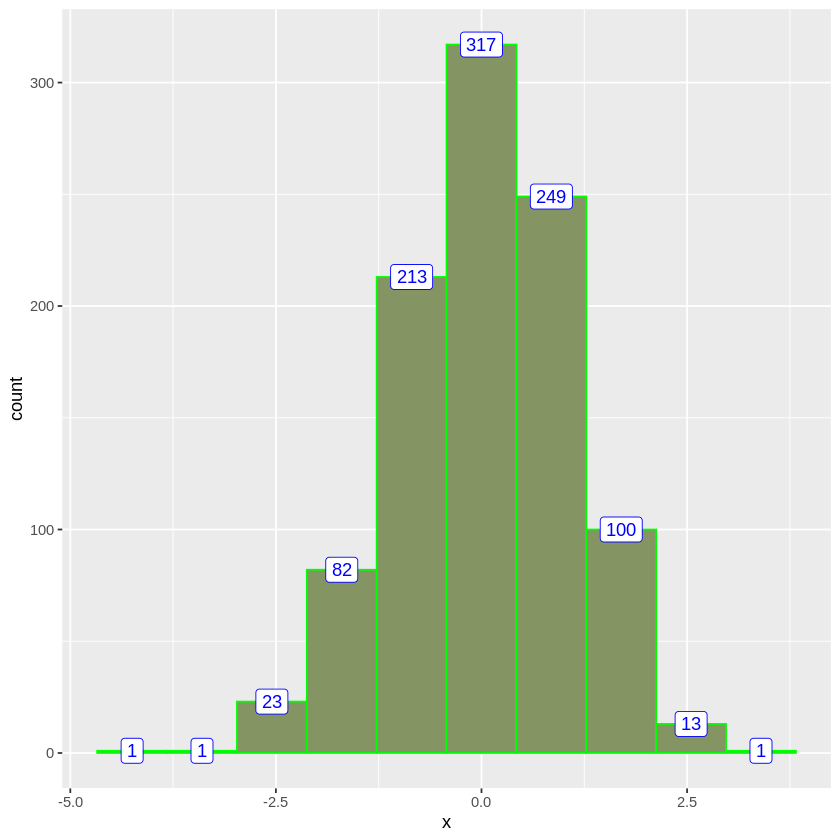

In [11]:
# Histograma de frecuencias relativas
set.seed(15)
data <-data.frame(x = rnorm(1000))

data %>%
  ggplot(aes(x, y = ..count..)) +
  geom_histogram(
    bins = 10, # número de barras
    fill = "#849463",#color del relleno de la barra (notar que tb se puede asignar como RGB)
    col = "green" # color del contorno de la barra (también se podría asignar como RGB)
  ) +
  stat_bin(
    bins = 10, # stat_bin permite generar cortes en la variable del eje X
    geom ='label', # tipo de geometría a indicar en la etiqueta (puede ser text, label, point, y cualquiera de las capas que están disponibles) )
    color='blue', # color de la etiqueta
    mapping = aes(label=..count..), # mapeo estético que queremos visualizar en cada bin. En este caso es el conteo dentro de cada bin
    position = position_stack(vjust = 1) # posición relativa dentro de cada barra
  )



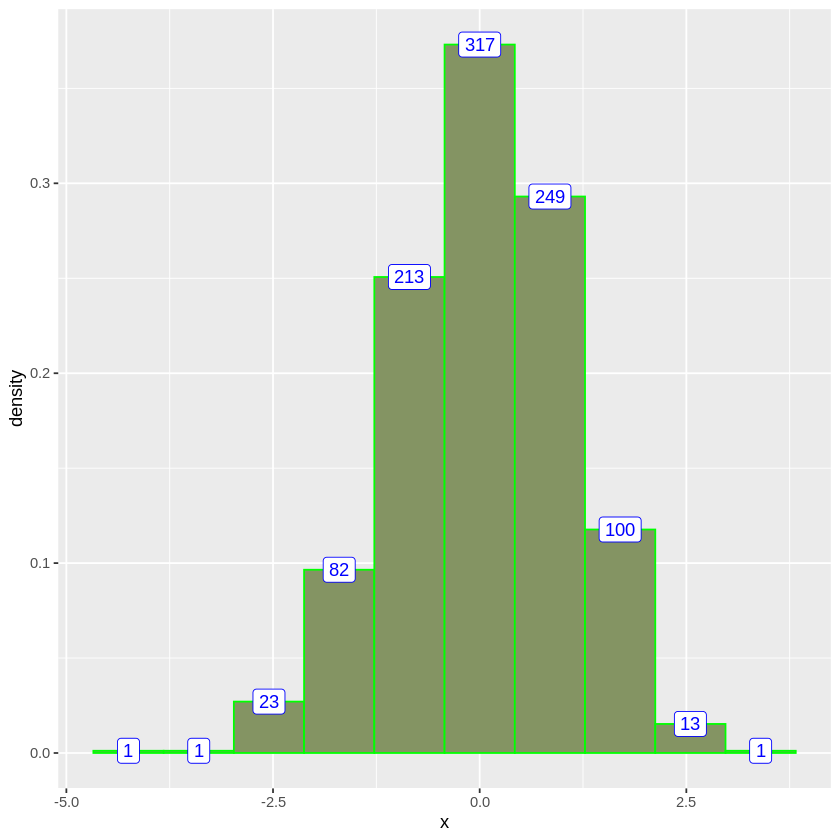

In [12]:
# Adicionalmente, si se quiere mostrar el histograma de frecuencia --------
#  es lo mismo pero se añade y = ..density.. en el maepo estético del histograma

data %>%
  ggplot(aes(x,y = ..density..)) + # se añade y = ..density.. para visualizar las frecuencias
  geom_histogram(
    bins = 10, # número de barras
    fill = "#849463",#color del relleno de la barra (notar que tb se puede asignar como RGB)
    col = "green" # color del contorno de la barra (también se podría asignar como RGB)
  ) +
  stat_bin(
    bins = 10, # stat_bin permite generar cortes en la variable del eje X
    geom ='label', # tipo de geometría a indicar en la etiqueta (puede ser text, label, point, y cualquiera de las capas que están disponibles) )
    color='blue', # color de la etiqueta
    mapping = aes(label=..count..), # mapeo estético que queremos visualizar en cada bin. En este caso es el conteo dentro de cada bin
    position = position_stack(vjust = 1) # posición relativa dentro de cada barra
  )



## `theme()`: Permite modificar diversos parámetros gráficos, en particualar la orientación de los ejes.

`summarise()` regrouping output by 'year', 'month' (override with `.groups` argument)



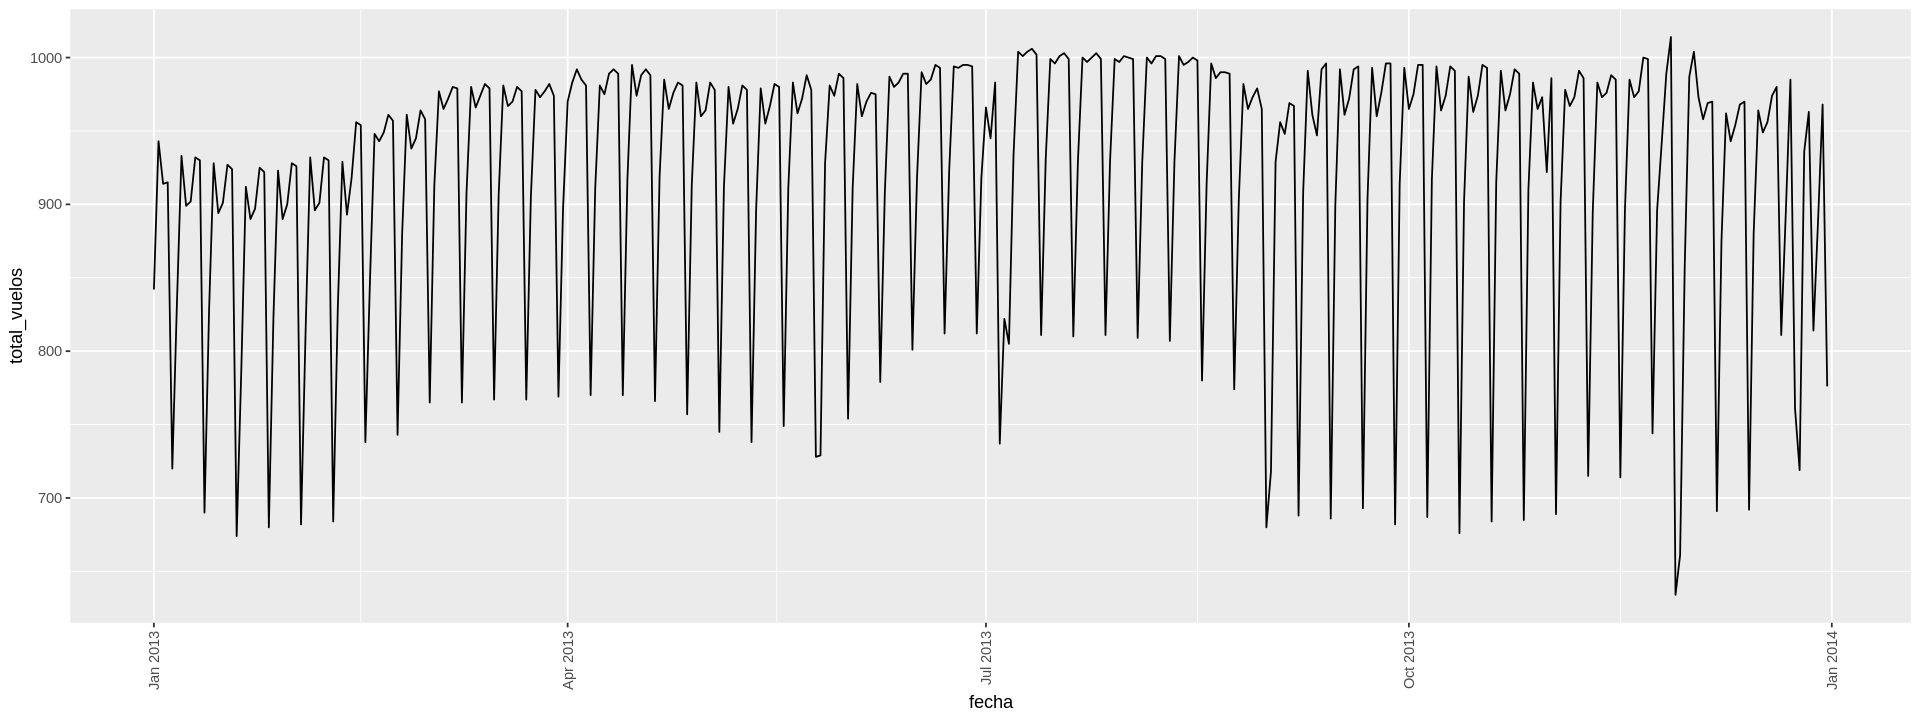

In [16]:
options(repr.plot.width=16, repr.plot.height=6)
# Orientación etiquetas ejes ----------------------------------------------
data(flights)

# A modo de ejemplo podemos visulizar el total de vuelos por día .

flights %>%
  group_by(year,month,day) %>%
  summarise(total_vuelos = n()) %>%
  mutate(fecha = as.Date(paste0(year,
                                ifelse(nchar(month) == 1, paste0("0",month),month),
                                ifelse(nchar(day) == 1, paste0("0",day),day)
                                ),
                                format = "%Y%m%d")) %>%
  ggplot() +
  aes(x = fecha, y = total_vuelos) + 
  geom_line() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = .5,hjust = 1)
  ) 

# La función element_text() permite modificar orientación, y ajste vertical y hoizontal


## `geom_label()`: Al igual que `geom_text()`, permite añadir etiquetas en la visualización, sin la necesidad de generar manualmente los bins.

Para ello, como ejercicio, buscaremos replicar el siguiente gráfico.

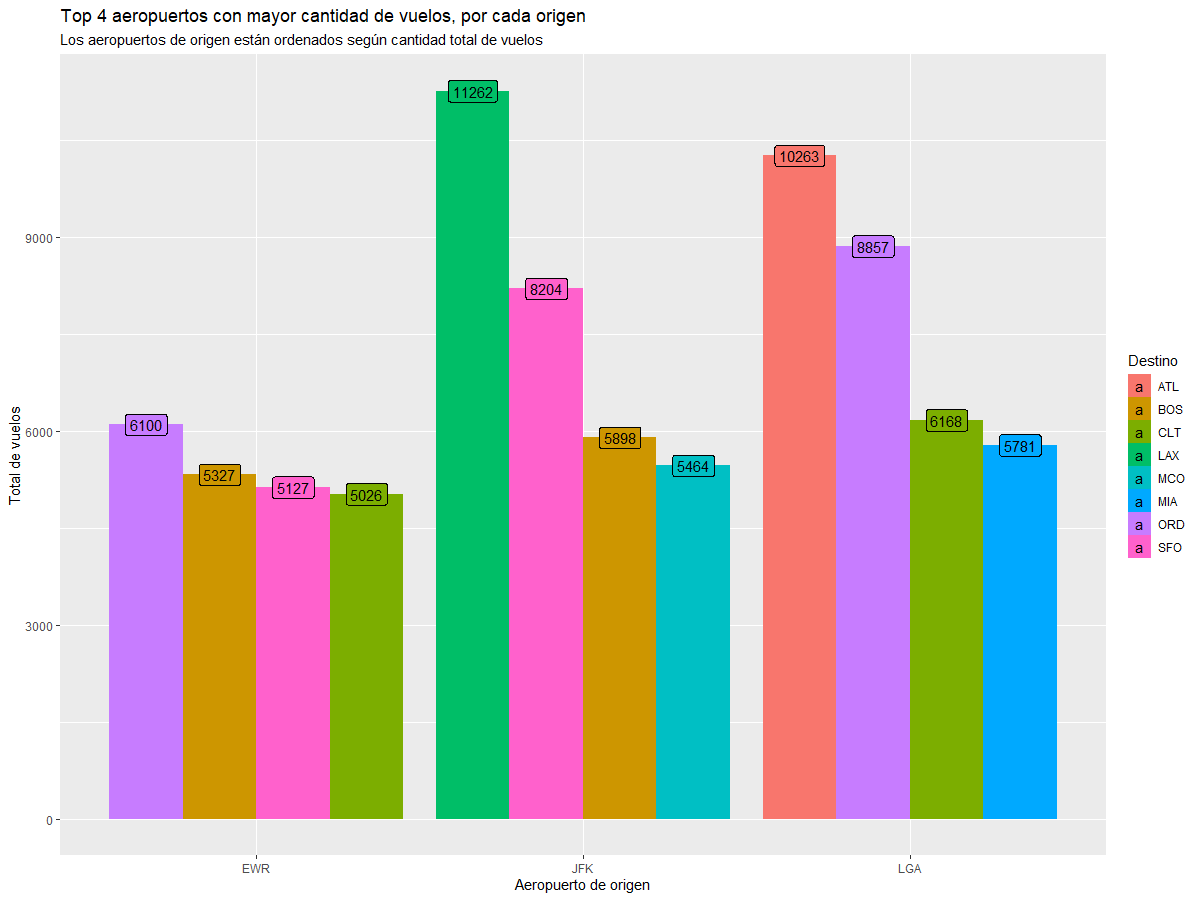


In [18]:
data(flights)
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


`summarise()` regrouping output by 'origin' (override with `.groups` argument)



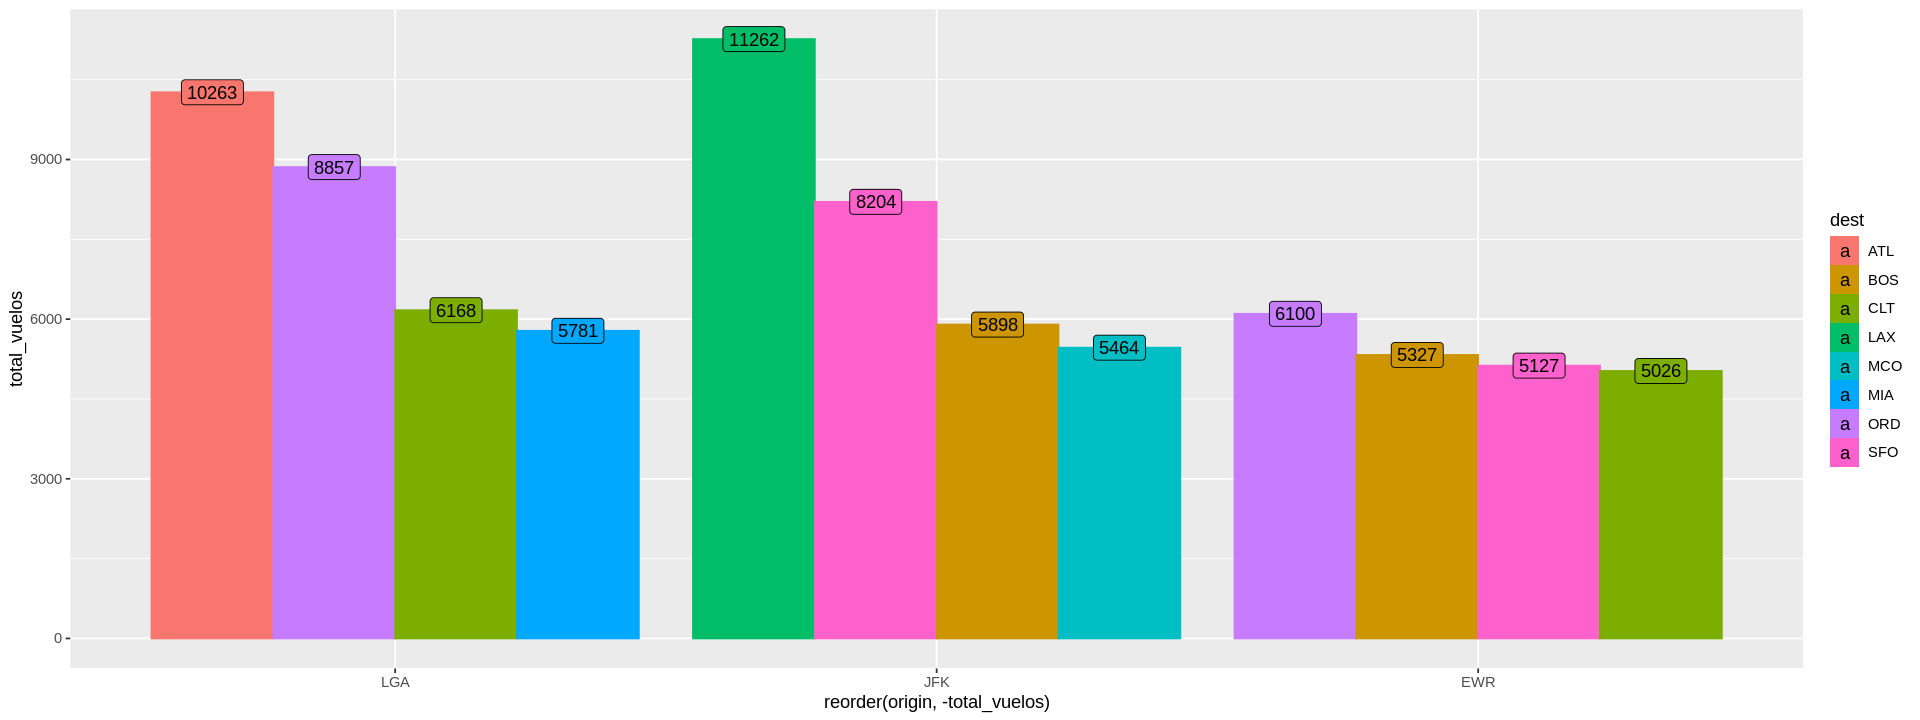

In [58]:


# Contamos con las capas geom_label y geom_text ---------------------------------
# Para ello visualizaremos los 4 aeropuertos de destino con mayor cantidad de vuelos, por cada aeropuerto de origen
# conteo por origen destino -----------------------------------------------------

flights %>%
  group_by(origin, dest) %>%
  summarise(total_vuelos = n()) %>%
  ungroup() %>%
  group_by(origin) %>%
  mutate(total_origen = sum(total_vuelos)) %>%
  arrange(desc(total_vuelos), .by_group = T) %>%# Nos aseguramos que se ordene por cada grupo
  top_n(n = 4, wt = total_vuelos) %>% 
  ggplot() +
  aes(x = reorder(origin, -total_vuelos), y = total_vuelos, color = dest, fill = dest, group = -total_vuelos) +
  geom_bar(stat = "identity", position = "dodge") + # stat = identity, indica que tomará el y entregado en aes y no calculará su propio conteo.
  geom_label (aes(label = total_vuelos), position = position_dodge(width = 0.9) ,color = "black")
  
# Otra alternativa es con count()
#flights %>%
#  count(origin, dest) 


In [37]:
# Otra alternativa: utilizando row_number.
flights %>%
  group_by(origin, dest) %>%
  summarise(total_vuelos = n()) %>%
  ungroup() %>%
  group_by(origin) %>%
  mutate(total_origen = sum(total_vuelos)) %>%
  arrange(desc(total_vuelos), .by_group = T) %>%# Nos aseguramos que se ordene por cada grupo
  mutate(rk = row_number()) %>%
  filter(rk %in% c(1, 10 ,50)) # la ventaja es que podemos realizar consultas de este tipo, no solamente el "top n"

`summarise()` regrouping output by 'origin' (override with `.groups` argument)



origin,dest,total_vuelos,total_origen,rk
<chr>,<chr>,<int>,<int>,<int>
EWR,ORD,6100,120835,1
EWR,DTW,3178,120835,10
EWR,GSP,745,120835,50
JFK,LAX,11262,111279,1
JFK,DCA,3270,111279,10
JFK,PSE,365,111279,50
LGA,ATL,10263,104662,1
LGA,MSP,3713,104662,10
LGA,DSM,158,104662,50
